<a href="https://colab.research.google.com/github/rajan-dhinoja/machine_learning_projects/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step-A: Data Preprocessing:-***

## Step-1: Import Required Dependencies:-
Import essential libraries and modules for data manipulation, visualization, and preprocessing...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set the option to prevent silent downcasting
np.set_printoptions(formatter={'float': '{:,.2f}'.format}, suppress=True, precision=2)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('future.no_silent_downcasting', True)

## Step-2: Load the Dataset and Display Different overviews of Datasets:-

In [2]:
dataset = pd.DataFrame(pd.read_csv('train_data.csv'))
# dataset = pd.DataFrame(pd.read_csv('data.csv'))
dataset.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.02,Dairy,249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"3,735.14"
1,DRC01,5.92,Regular,0.02,Soft Drinks,48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.42
2,FDN15,17.50,Low Fat,0.02,Meat,141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"2,097.27"
3,FDX07,19.20,Regular,0.00,Fruits and Vegetables,182.09,OUT010,1998,NaN,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0.00,Household,53.86,OUT013,1987,High,Tier 3,Supermarket Type1,994.71


In [3]:
# Seperate the whole datset into categorical and numerical columns...

categorical_cols = dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(exclude=['object']).columns

print("Categorical Columns: \n", categorical_cols, "\n")
print("Numerical Columns: \n", numerical_cols)

Categorical Columns: 
 Index(['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize',
       'LocationType', 'OutletType'],
      dtype='object') 

Numerical Columns: 
 Index(['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear',
       'OutletSales'],
      dtype='object')


In [4]:
print("> Shape of the Dataset: \n", dataset.shape, "\n")
print("> Information about Dataset:")
print(dataset.info(), "\n")
print("> Statistical summary of the Dataset:")
print(dataset.describe().map(lambda x: round(x, 4)))

> Shape of the Dataset: 
 (8523, 12) 

> Information about Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None 

> Statistical summary of the Dataset:
        Weight  ProductVisibility      MRP  

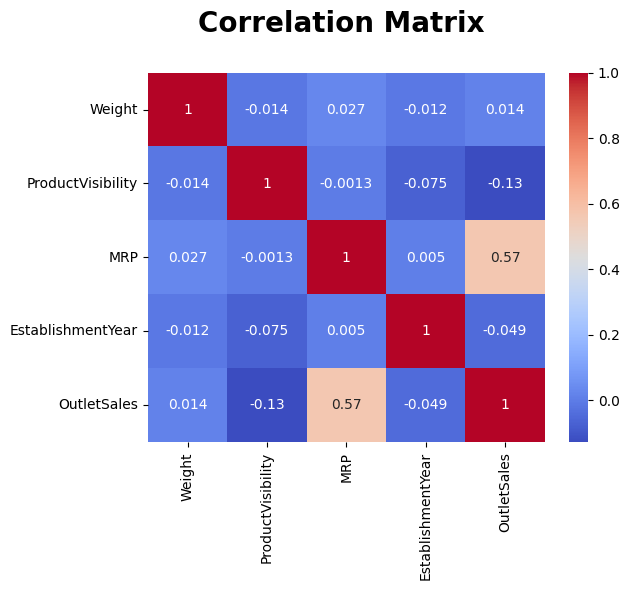

In [5]:
# Correlation Matrix Heatmap
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix \n',fontsize=20,  fontweight=800)
plt.show()

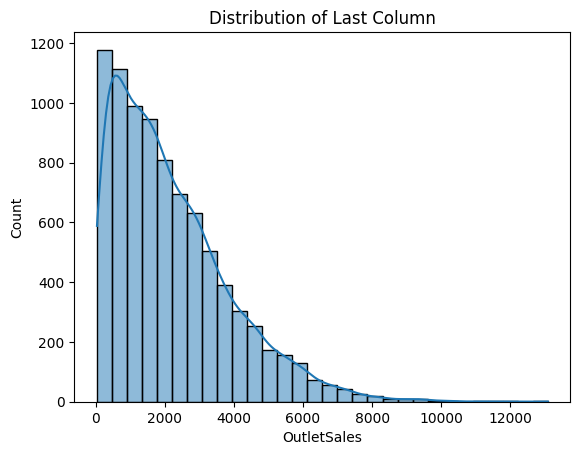

In [6]:
# Plot target distribution
sns.histplot(dataset.iloc[:, -1], bins=30, kde=True)
plt.title('Distribution of Last Column')
plt.show()

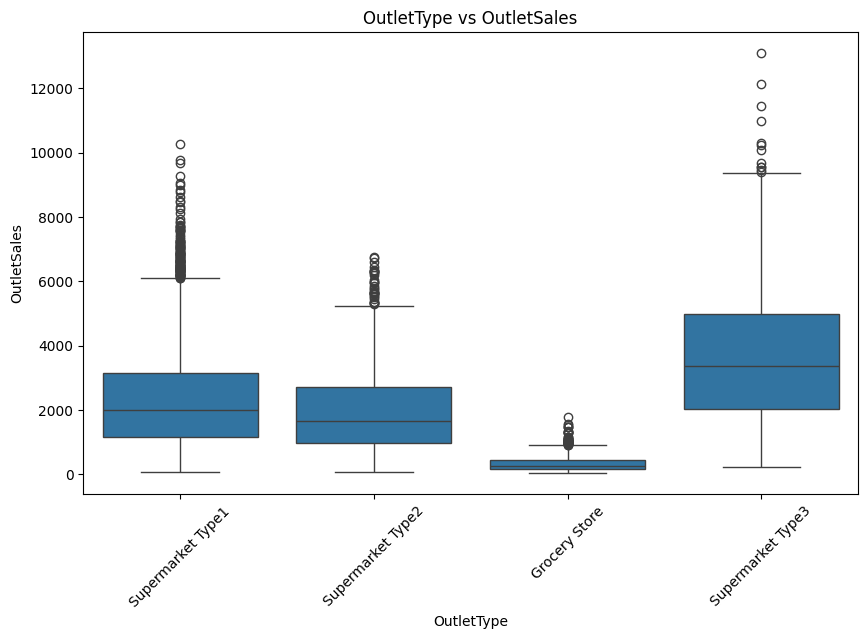

In [7]:
# Boxplot for OutletType vs OutletSales
plt.figure(figsize=(10, 6))
sns.boxplot(x='OutletType', y='OutletSales', data=dataset)
plt.xticks(rotation=45)
plt.title('OutletType vs OutletSales')
plt.show()

## Step-3:- Checking the Dataset:-

### Step-3.1: Checking any Duplicate Data and Handling them:-

In [8]:
if dataset.duplicated().any():
  dataset.drop_duplicates(inplace=True)
  print("Duplicate Data(or Identical Rows) found and Removed...")
else:
    print("No Duplicate Data(or Identical Rows) found...")

No Duplicate Data(or Identical Rows) found...


### Step-3.2: Cheking any Missing Data and Handling them:-

In [9]:
# Here from the module named impute of the library scikit-learn, we are using the SimpleImputer Class to Handle the Missing Values.
from sklearn.impute import SimpleImputer

missing_data_counts = dataset.isnull().sum() + dataset.isin(['', 'N/A', 'Unknown', 'NaN']).sum()

# if dataset.isnull().values.any() or dataset.isin(['', 'NaN', 'N/A', 'Unknown']).any().any():
if missing_data_counts.any():

  categorical_missing_counts = dataset[categorical_cols].isnull().sum() + dataset[categorical_cols].isin(['', 'N/A', 'Unknown', 'NaN']).sum()
  numerical_missing_counts = dataset[numerical_cols].isnull().sum()

  # Replace "Unknown" with NaN in categorical columns
  for col in categorical_cols:
    dataset[col] = dataset[col].replace('Unknown', np.nan)


  # Check if there are any missing values (categorical or numerical)
  if categorical_missing_counts.any() or numerical_missing_counts.any():
      # Print missing counts for categorical columns in the desired format
      print("Missing Data Counts in Categorical Columns: \n", categorical_missing_counts)
      print("\n")
      print("Missing Data Counts in Numerical Columns: \n", numerical_missing_counts)

      # Create imputers for categorical and numerical features
      categorical_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
      numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

      # Apply imputers to the selected columns in X
      if len(categorical_cols) > 0:
        categorical_cols_for_impution = [col for col in categorical_cols if col != dataset.columns[-1]]
        dataset[categorical_cols_for_impution] = categorical_imputer.fit_transform(dataset[categorical_cols_for_impution])

      # Exclude the dependent variable column (last column) if it's numerical
      numerical_cols_for_impution = [col for col in numerical_cols if col != dataset.columns[-1]]
      if len(numerical_cols_for_impution) > 0:
          dataset[numerical_cols_for_impution] = numerical_imputer.fit_transform(dataset[numerical_cols_for_impution])
      # if len(numerical_cols) > 0:
          # dataset[numerical_cols] = numerical_imputer.fit_transform(dataset[numerical_cols])

      print("\n")
      print("New Data with replaced missing values: \n", dataset)
else:
    print("No missing data found.")



Missing Data Counts in Categorical Columns: 
 ProductID          0
FatContent         0
ProductType        0
OutletID           0
OutletSize      2410
LocationType       0
OutletType         0
dtype: int64


Missing Data Counts in Numerical Columns: 
 Weight               1463
ProductVisibility       0
MRP                     0
EstablishmentYear       0
OutletSales             0
dtype: int64


New Data with replaced missing values: 
      ProductID  Weight FatContent  ProductVisibility            ProductType  \
0        FDA15    9.30    Low Fat               0.02                  Dairy   
1        DRC01    5.92    Regular               0.02            Soft Drinks   
2        FDN15   17.50    Low Fat               0.02                   Meat   
3        FDX07   19.20    Regular               0.00  Fruits and Vegetables   
4        NCD19    8.93    Low Fat               0.00              Household   
...        ...     ...        ...                ...                    ...   
8518     

### Step-3.3: Checking any Synonyms or Aliases and Handling them:-

In [10]:
for col in dataset.columns:
  # Get value counts and convert to DataFrame with column name
  # .reset_index(name='Counts: '): This converts the Series into a DataFrame and names the count column as 'Counts: '.
  value_counts_dataset = dataset[col].value_counts().rename_axis('Unique Values: ').reset_index(name='Counts: ')

  # Transpose and print with formatting
  print(f"Column: \t'{col}'")
  # .to_string(header=False): This converts the transposed DataFrame to a string for printing and removes the header row.
  print(value_counts_dataset.T.to_string(header=False), "\n")


Column: 	'ProductID'
Unique Values:   FDW13  FDG33  NCY18  FDD38  DRE49  FDV60  NCQ06  FDF52  FDX04  NCJ30  FDV38  NCF42  FDT07  FDW26  NCL31  FDU12  FDG09  FDQ40  FDX20  NCI54  FDX31  FDP25  FDW49  FDF56  FDO19  DRN47  NCB18  FDE11  NCX05  FDQ39  FDT55  FDO32  FDT40  FDZ20  FDH27  FDY49  FDS33  FDR04  FDR43  FDR59  FDJ55  FDT24  FDY55  FDV09  FDU23  FDY47  DRD25  FDK58  FDL58  FDX58  FDR44  FDP28  FDA39  FDH28  DRF27  FDX21  FDY56  FDF05  FDL20  FDY03  NCK05  FDS55  DRA59  FDG24  NCE54  FDZ21  FDA04  FDW24  FDT49  DRF23  FDD05  FDH10  FDX50  FDT32  FDK20  FDU13  FDN56  FDZ26  FDL34  DRF01  FDG38  NCE31  NCL53  NCB31  NCQ05  FDT21  NCV06  DRJ24  FDI41  FDO52  FDR23  FDG57  FDZ33  DRF03  FDA13  FDF22  DRP35  NCV41  FDF16  FDB17  NCK29  FDJ44  FDX45  NCY29  NCO54  FDR52  NCQ43  FDR48  FDA50  NCM07  FDW48  NCI29  FDP11  FDH33  FDF04  FDD29  FDR46  DRK12  FDA15  FDJ58  FDS52  FDC14  FDU19  NCC18  FDA44  FDL10  FDI22  NCK53  NCX29  FDO37  FDV20  DRI03  DRK35  NCP05  FDO10  FDV26  NCS53  FDR

In [11]:
# # Handling ProductID Column
dataset['ProductID'] = dataset['ProductID'].apply(lambda x: x[:2])
# dataset['ProductID'] = dataset['ProductID'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})
print("> After Handling the Prefixes of 'ProductID' Column and changed to new Name:")
print(dataset['ProductID'].value_counts())

# print("\n")

# Handling FatContent Column
dataset['FatContent'] = dataset['FatContent'].replace({ 'LF': 'Low Fat', 'low fat': 'Low Fat', 'Low fat': 'Low Fat', 'reg': 'Regular'})
dataset.loc[dataset['ProductID'] == 'NC', 'FatContent'] = 'Non-Edible'
print("> After Handling the Aliases of 'FatContent' Column:")
print(dataset['FatContent'].value_counts())

print("\n")

# Handling EstablishmentYear Column
import datetime as dt
current_year = dt.datetime.today().year
dataset['OutletAge'] = current_year - dataset['EstablishmentYear']
dataset = dataset.drop('EstablishmentYear', axis=1)
print("> 'EstablishmentYear' column is Deleted, Instead 'OutletAge' column is created...")
print(dataset['OutletAge'].value_counts())

> After Handling the Prefixes of 'ProductID' Column and changed to new Name:
ProductID
FD    6125
NC    1599
DR     799
Name: count, dtype: int64
> After Handling the Aliases of 'FatContent' Column:
FatContent
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64


> 'EstablishmentYear' column is Deleted, Instead 'OutletAge' column is created...
OutletAge
40.00    1463
38.00     932
26.00     930
28.00     930
21.00     930
23.00     929
16.00     928
18.00     926
27.00     555
Name: count, dtype: int64


### Step-3.4: Checking any Categorical Data and Encoding them:-

In [12]:
# `sklearn.compose` is a module in scikit-learn (a popular Python machine learning library) used for combining different data transformations.
# sklearn.preprocessing is a module within scikit-learn that provides tools for preparing your data for machine learning algorithms.
# LabelEncoder is a specific class designed to convert categorical labels (like 'France', 'Spain', 'Germany') into numerical labels (like 0, 1, 2).
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1].values
repeating_cols = []

for col in categorical_cols:
    # Matrix of Feature
    if col != dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'.")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        repeating_cols.append(col)
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}.")
        print(f"\t-'{col}' is Encoded Successfully...\n")

      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

    # Dependent Variable/Output
    elif col == dataset.columns[-1]:
      print(f"> String Values present in Column '{col}'(Output Column).")
      # Check for repeating values within the categorical column
      value_counts = dataset[col].value_counts()
      repeating_values = value_counts[value_counts > 1].index.tolist()
      if repeating_values:
        print(f"\t- Also, Categorical values found in column '{col}': {repeating_values}")
        le = LabelEncoder()
        y = le.fit_transform(dataset[col])
        print(f"\t-'{col}' is Encoded Successfully...\n")
      else:
        print(f"\t- But No Categorical values found in column '{col}'.\n")

print("Repeating Columns in Matrix of Features(X): ", repeating_cols, "\n")

if repeating_cols:
    encoder = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), repeating_cols)], remainder='passthrough')
    X = np.array(encoder.fit_transform(X))

print("Matrix of Features(X): \n", X)
print("\n")
print("Dependent Variable(y): \n", y)


> String Values present in Column 'ProductID'.
	- Also, Categorical values found in column 'ProductID': ['FD', 'NC', 'DR'].
	-'ProductID' is Encoded Successfully...

> String Values present in Column 'FatContent'.
	- Also, Categorical values found in column 'FatContent': ['Low Fat', 'Regular', 'Non-Edible'].
	-'FatContent' is Encoded Successfully...

> String Values present in Column 'ProductType'.
	- Also, Categorical values found in column 'ProductType': ['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood'].
	-'ProductType' is Encoded Successfully...

> String Values present in Column 'OutletID'.
	- Also, Categorical values found in column 'OutletID': ['OUT027', 'OUT013', 'OUT049', 'OUT046', 'OUT035', 'OUT045', 'OUT018', 'OUT017', 'OUT010', 'OUT019'].
	-'OutletID' is Encoded Successfully...

> String Values present

## Step-4: Split the Dataset into the Training set and Test set:-

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Printing Training Sets:")
print("> X_train: \n", X_train)
print("> X_test: \n", X_test)
print("\n")
print("Printing Test Sets:")
print("> y_train: \n", y_train)
print("> y_test: \n", y_test)

TypeError: Input should have at least 1 dimension i.e. satisfy `len(x.shape) > 0`, got scalar `array(<8523x46 sparse matrix of type '<class 'numpy.float64'>'
	with 93227 stored elements in Compressed Sparse Row format>, dtype=object)` instead.

## Step-5: Feature Scaling:-

In [ ]:
# """ Here we are not applying Feature Scaling in Dependent Variable (y), because there are only 0 and 1 values in y """
# # StandardScaler class from scikit-learn, which is a tool for standardization and Normalization.
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train[:, 3: ] = sc.fit_transform(X_train[:, 3:])
# X_test[:, 3: ] = sc.transform(X_test[:, 3:])

# print("Printing Training Sets after Feature Scaling:")
# print("> X_train: \n", X_train)
# print("\n")
# print("Printing Test Sets after Feature Scaling:")
# print("> X_test: \n", X_test)

# ***Step-B: Model Builing (Regression):-***

## Step-1: Model Building

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)

## Step-2: Predicting a new result

In [ ]:
# y_pred = model.predict(X_test)

In [ ]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred)